# Import Packages

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [10]:
anime = pd.read_csv('/Users/music/Desktop/anime.csv')
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


# Data Wrangling

In [11]:
anime.dropna(inplace=True)

# Single Sample t-test

### Is a Rating Score of 6.2 Different from the mean in this dataset? Use the variable score.

## Test Assumptions - Normally Distributed

<AxesSubplot:>

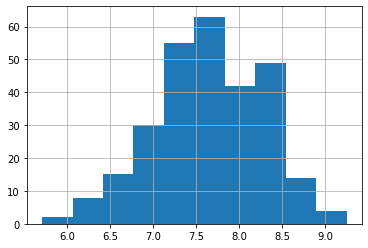

In [14]:
anime['score'].hist()

# Run the Analysis

In [15]:
stats.ttest_1samp(anime['score'],6.2)

Ttest_1sampResult(statistic=39.40626105964426, pvalue=1.7928730897960434e-116)

In [16]:
anime.score.mean()

7.659645390070922

## The rating score of 6.2 is different from the mean which is 7.66 in this dataset.

# Independent t-test

### Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing? Use the variables status and popularity.

## Test Assumptions - Normally Distributed

In [21]:
anime.status.value_counts()

Finished Airing     280
Currently Airing      2
Name: status, dtype: int64

<AxesSubplot:>

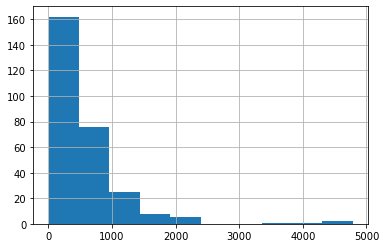

In [31]:
anime.popularity[anime.status == 'Finished Airing'].hist()

<AxesSubplot:>

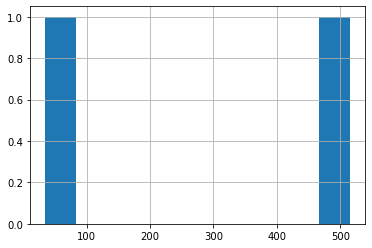

In [32]:
anime.popularity[anime.status == 'Currently Airing'].hist()

# Run the Analysis

In [33]:
ttest_ind(anime.popularity[anime.status == 'Finished Airing'], anime.popularity[anime.status == 'Currently Airing'])

Ttest_indResult(statistic=0.6061071744180863, pvalue=0.5449346270749709)

In [34]:
anime.groupby('status')['popularity'].mean()

status
Currently Airing    275.000000
Finished Airing     542.042857
Name: popularity, dtype: float64

## The anime that is still airing is lower in popularity from anime that is no longer airing. 

# Independent Chi-Square

### Does the Source of the Anime Influence the Type of Anime?

#### Use the variable source, recoded to have four levels: Manga, Book, Game, Listening, And use the variable type.

In [36]:
crosstab = pd.crosstab(anime ['source'], anime['type'])

In [37]:
crosstab

type,TV
source,
4-koma manga,8
Book,1
Game,9
Light novel,76
Manga,117
Novel,10
Original,43
Other,1
Visual novel,14


In [38]:
stats.chi2_contingency(crosstab)

(0.0,
 1.0,
 0,
 array([[  8.],
        [  1.],
        [  9.],
        [ 76.],
        [117.],
        [ 10.],
        [ 43.],
        [  1.],
        [ 14.],
        [  3.]]))

In [40]:
anime.type.value_counts()

TV    282
Name: type, dtype: int64

In [41]:
anime.source.value_counts()

Manga           117
Light novel      76
Original         43
Visual novel     14
Novel            10
Game              9
4-koma manga      8
Web manga         3
Other             1
Book              1
Name: source, dtype: int64

## The source of the anime does not influence the type of anime. 

# Correlation

### positive both things go up together, neg is a inverse relationship

In [47]:
anime['score'].corr(anime['scored_by'])

0.4438047340084272

<AxesSubplot:>

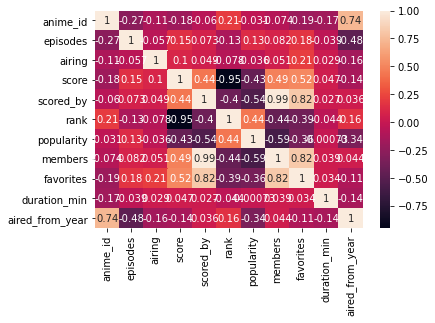

In [48]:
sns.heatmap(anime.corr(), annot=True)

# How do the Variables about Popularity / Ranking Relate to Each Other?
## Use the following variables: score, scored_by, rank, popularity, members, favorites

## Rank to other variables
#### Rank to score is highly correlated (-0.95) and is going in opposite directions. 
#### Rank to scored_by is not highly correlated (-0.4) and is going in opposite directions. 
#### Rank to popularity is not highly correlated (0.4) and is going in the same direction.
#### Rank to members is not highly correlated (-0.4) and is going in opposite directions
#### Rank to favorites is not highly correlated (-0.39) and is going in opposite directions

## Popularity to other variables
#### Popularity to score is not highly correlated (-0.4) and is going in opposite directions.
#### Popularity to scored_by is mediam correlated (-0.5) and is going in opposite directions.
#### Popularity to rank is not highly correlated (0.4) and is going in the same direction.
#### Popularity to members is mediam correlated (-0.6) and is going in opposite directions.
#### Popularity to favorites is not highly correlated (-0.36) and is going in opposite directions.